In [1]:
import gensim.downloader as api
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.decomposition import PCA

import numpy as np
import pickle
import json
import copy
import pandas as pd
from tqdm import tqdm
import scipy.stats as stats


from Vocab import Vocab
vocab = Vocab('data/vocab.csv', 3)
from get_predictions import get_predictions
from helpers import *

from ChainDataset import ChainDataset

chain_test_set = ChainDataset(
    data_dir='data/',
    segment_file='segments.json',
    chain_file='test_chains.json',
    vectors_file='vectors.json',
    split='test'
)

from SegmentDataset import SegmentDataset

segment_test_set = SegmentDataset(
    data_dir='data/',
    segment_file='segments.json',
    vectors_file='vectors.json',
    split='test'
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initialising vocab from file.


In [28]:
oov_dict

{'grey': 'gray',
 'ok.': 'OK',
 't-shirt': 'tshirt',
 'w/': 'with',
 'frige': 'fridge',
 'red/white': 'red and white',
 'doughnuts': 'donuts',
 'didnt': "didn't",
 'ok..': 'ok',
 'dr.': 'dr',
 'no..': 'no',
 'doughnut': 'donut',
 'yes..': 'yes',
 'yellow/orange': 'yellow and orange',
 'pic..': 'picture',
 'umberlla': 'umbrella',
 'cest': 'chest',
 'k..next': 'ok, next',
 'surboard': 'surfboard',
 'blue/white': 'blue and white',
 'man/woman': 'man or woman',
 'doesnt': "doesn't",
 'scheppa': 'schepps',
 'guy/girl': 'guy or girl',
 'blue/green': 'blue and green',
 'schepp': 'schepps',
 'blue/black': 'blue and black',
 'motarcycle': 'motorcycle',
 'red/black': 'red and black',
 'red/white/blue': 'red, white and blue',
 'colour': 'color',
 'close-up': 'closeup',
 'green/yellow': 'green and yellow',
 'red/pink': 'red and pink',
 'buddist': 'buddhist',
 'longsleeves': 'long sleeves',
 'ihave': 'i have',
 'yellow/green': 'yellow and green',
 'no-': 'no',
 'k.': 'ok',
 'surfobard': 'surfboard'

## POS tags distribution


In [2]:
from collections import Counter
import nltk
import pickle
from nltk import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

import matplotlib
import matplotlib.pyplot as plt

with open('oov_dictionary.pickle', 'rb') as f:
    oov_dict = pickle.load(f)

top_10 = ['NOUN', 'DET', 'VERB', 'ADP', 'ADJ', '.', 'ADV', 'NUM', 'PRON', 'CONJ']
top_4 = ['NOUN', 'VERB', 'ADJ', 'ADV']

''' explanation:

ADJ	adjective	new, good, high, special, big, local
ADP	adposition	on, of, at, with, by, into, under
ADV	adverb	really, already, still, early, now
CONJ	conjunction	and, or, but, if, while, although
DET	determiner, article	the, a, some, most, every, no, which
NOUN	noun	year, home, costs, time, Africa
NUM	numeral	twenty-four, fourth, 1991, 14:24
PRT	particle	at, on, out, over per, that, up, with
PRON	pronoun	he, their, her, its, my, I, us
VERB	verb	is, say, told, given, playing, would
.	punctuation marks	. , ; !
X	other	ersatz, esprit, dunno, gr8, univeristy

'''



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


' explanation:\n\nADJ\tadjective\tnew, good, high, special, big, local\nADP\tadposition\ton, of, at, with, by, into, under\nADV\tadverb\treally, already, still, early, now\nCONJ\tconjunction\tand, or, but, if, while, although\nDET\tdeterminer, article\tthe, a, some, most, every, no, which\nNOUN\tnoun\tyear, home, costs, time, Africa\nNUM\tnumeral\ttwenty-four, fourth, 1991, 14:24\nPRT\tparticle\tat, on, out, over per, that, up, with\nPRON\tpronoun\the, their, her, its, my, I, us\nVERB\tverb\tis, say, told, given, playing, would\n.\tpunctuation marks\t. , ; !\nX\tother\tersatz, esprit, dunno, gr8, univeristy\n\n'

In [7]:
dataset_pred_no_hist, dataset_pred_hist_cp, conditions_inds, condition_seg_hist, dataframe = get_pred_datasets_orig()
# dataset_pred_no_hist, dataset_pred_hist_cp, conditions_inds, condition_seg_hist, dataframe

dataset_pred_no_hist, dataset_pred_hist_cp

loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test
history dataset with test_segments.json vectors.json test_chains.json test
processing test

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]], device='cuda:0'), 'loss': tensor(4.9204, device='cuda:0'), 'ranks': [0]}
getting predicito

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4074.28it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4256.88it/s]


(<SegmentDataset.SegmentDataset at 0x2694c8eff88>,
 <HistoryDataset.HistoryDataset at 0x2694bde5dc8>)

In [9]:
condition_seg_hist['hT_nhT']

{11: {1: {'first_id': 1,
   'first_seg': [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31],
   'current_id': 11,
   'current_seg': [5, 294, 51, 29, 49, 10, 4, 17, 8, 7, 20],
   'round': 2}},
 12: {5: {'first_id': 3,
   'first_seg': [5,
    38,
    191,
    23,
    127,
    11,
    6,
    120,
    23,
    127,
    15,
    9,
    314,
    10,
    4,
    13,
    5,
    80,
    14,
    128,
    68,
    22,
    10],
   'current_id': 12,
   'current_seg': [4,
    12,
    22,
    7,
    38,
    191,
    23,
    127,
    11,
    1567,
    15,
    9,
    314,
    10,
    5,
    8,
    12,
    31,
    7,
    20,
    21],
   'round': 2}},
 13: {2: {'first_id': 2,
   'first_seg': [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41],
   'current_id': 13,
   'current_seg': [5, 549, 23, 435, 51, 29, 26, 49, 10, 4, 13, 5, 80],
   'round': 1}},
 14: {3: {'first_id': 2,
   'first_seg': [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41],
   'current_id': 14,
   'current_seg': [4,
    12,
    22,
    7,
    6,


In [5]:
# prepare the dicts. so for every group there are 5 rounds with a list
hT_nhF = {} 
hT_nhT = {}
hF_nhF = {}
hF_nhT = {}
dict_groups = [hT_nhF, hT_nhT, hF_nhF, hF_nhT]
rounds = ['1', '2', '3', '4', '5']
index = [0, 0, 0, 0, 0, 0]

for group in dict_groups:
    for round in rounds:
        group[round] = index
        
hT_nhF

{'1': [0, 0, 0, 0, 0, 0],
 '2': [0, 0, 0, 0, 0, 0],
 '3': [0, 0, 0, 0, 0, 0],
 '4': [0, 0, 0, 0, 0, 0],
 '5': [0, 0, 0, 0, 0, 0]}

## Ratio content words per round

In [6]:
# prepare the dicts. so for every group there are 5 rounds with a list
hT_nhF = {} 
hT_nhT = {}
hF_nhF = {}
hF_nhT = {}
dictionaries = [hT_nhF, hT_nhT, hF_nhF, hF_nhT]
dict_names = ['hT_nhF', 'hT_nhT', 'hF_nhF', 'hF_nhT']
rounds = ['1', '2', '3', '4', '5']

for group in dictionaries:
    for round in rounds:
        group[round] = [0, 0, 0, 0, 0, 0]

# hT_nhF[1] = 10

def update_dict(candidate_dict, position, value):
    
    roundi = str(value['round'])
    current_value = hT_nhF[roundi]
    current_value[position] = current_value[position] + amount[0]

    candidate_dict[roundi] = current_value
    
    return candidate_dict

        
for dict_name, current_dict in zip(dict_names, dictionaries):
    for segment in condition_seg_hist[dict_name]:
        data = condition_seg_hist[dict_name][segment]
        for key, value in data.items():

            print("key", key)
            print("value", value)
            current_sentence = vocab.decode(value['current_seg'])
            try:
                current_sentence.remove('-A-')
                current_sentence.remove('-B-')
            except:
                None

            tags = sentence_to_pos_tags(current_sentence)

            for tag, amount in tags.items():

                if tag == "NOUN":
                    update_dict(current_dict, 0, value)



# # #             if tag == "VERB"
# # #             if tag == "ADV"
# # #             if tag == "ADJ"
# # #             print("TAG", tag, amount[0])
#             # #         ht_nhF['round'] 



NameError: name 'condition_seg_hist' is not defined

In [18]:
def pos_tag_distribution_per_group(group, condition_seg_hist, vocab):
    segments = list(condition_seg_hist[group])
    for segment in tqdm(segments):
        if condition_seg_hist[group][segment] == {}:
                continue

        # Get sentences per segment
        first_seg, current_seg = convert_to_sentences(segment, condition_seg_hist[group], vocab)
        first_sentence_dict = sentence_to_pos_tags(first_seg)
        current_sentence_dict = sentence_to_pos_tags(current_seg)

        # Update dicts
        update_dict(first_sentence_dict, total_first_seg_dict)
        update_dict(current_sentence_dict, total_current_dict)

    return total_first_seg_dict, total_current_dict

def convert_to_sentences(segment, dataset, vocab):
          
    # Decode first and current sentence 
    first_seg = list(dataset[segment].values())[0]['first_seg']

    current_seg = list(dataset[segment].values())[0]['current_seg']
    dec_first_seg = vocab.decode(first_seg)
    dec_current_seg = vocab.decode(current_seg)
    
    return dec_first_seg, dec_current_seg

def update_dict(new_dict, total_dict):
    for key, value in new_dict.items():
        new_key = key
        new_value = value

        for key, value in total_dict.items():
            if key == new_key:
                current_value = total_dict[key] 
                update_value = current_value + new_value[0]
                total_dict[key] = update_value
                
    return None

def dict_to_result(first_seg_dict, group, result, place): 
    #   convert dict to list for analysis
    
    dict_list = []
    total = 0
    for key, value in first_seg_dict.items():
        temp = [value,key]
        total += value
        dict_list.append(temp)
    
    # Convert to percentages
    for tag in dict_list:
        tag[0] = tag[0] / total
    
    dict_list.sort(reverse = True)
    group = group + "_" +  place
    
    result[group] = dict_list
    
    return result


def sentence_to_pos_tags(sentence):
    
    lower_case_sentence = []
    correct_sentence = [] 
    pos_tags = []
    

#   lower the sentences
    for word in sentence:
        lower_case_sentence.append(word.lower())
    
#   check if word is misspelled, the oov_dict can maybe corrrect that
    for word in lower_case_sentence:

        if word not in oov_dict:
            correct_sentence.append(word)
        else:
            correct_sentence.append(oov_dict[word])

    # Tag the sentence , so for every sentence got the pos tags
    try:
        pos_tags += [word[1] for word in pos_tag(correct_sentence, tagset='universal')]

    except:
        None

        
    pos_tag_dict = dict()       
    for key,value in dict(Counter(pos_tags)).items():
        pos_tag_dict[key] = [value]  

    return pos_tag_dict
 

In [19]:
groups = ['hT_nhF', 'hT_nhT', 'hF_nhF','hF_nhT']

result = {}
for group in groups:
    
    total_first_seg_dict = {
        'NOUN': 0,
        'DET': 0,
        'VERB': 0,
        'ADP': 0,
        'ADJ': 0,
        '.': 0,
        'ADV': 0,
        'NUM': 0,
        'PRON': 0,
        'CONJ': 0
    }

    total_current_dict = {
        'NOUN': 0,
        'DET': 0,
        'VERB': 0,
        'ADP': 0,
        'ADJ': 0,
        '.': 0,
        'ADV': 0,
        'NUM': 0,
        'PRON': 0,
        'CONJ': 0  
    }
    
# get pos tag count from the segments from the beginning and current data
    total_first_seg_dict, total_current_dict = pos_tag_distribution_per_group(group, condition_seg_hist, vocab)
    
    
#   CURRENt - FIRST. DRAAI ONDERSTAANDE REGELS OM ALS JE WILT ... FIRST - CURRENT
# convert the count to percentages >> distribution
    result = dict_to_result(total_current_dict, group, result, "current")
    result = dict_to_result(total_first_seg_dict, group, result, "first")

dif_hT_nhF = {}
dif_hT_nhT = {}
dif_hF_nhF = {}
dif_hF_nhT = {}


# prepare data for bar plots per group NOUN/VERB/ADJ/ADV
for key, value in result.items():    
    if key.startswith('hT_nhF'):
        # als de dict leeg is vul dan
        if bool(dif_hT_nhF) == False:
            for v in value:
                dif_hT_nhF[v[1]] = v[0]
              
        # als dict al gevuld is .. trek dan de bende er vanaf
        else:
#           loop door de values
            for v in value:
                for key, value in dif_hT_nhF.items():
#            als value == data dict doe aftrekken
                    if v[1] == key:
                        dif_hT_nhF[key] = dif_hT_nhF[key] - v[0]

    if key.startswith("hT_nhT"):
                # als de dict leeg is vul dan
        if bool(dif_hT_nhT) == False:
            for v in value:
                dif_hT_nhT[v[1]] = v[0]
              
        # als dict al gevuld is .. trek dan de bende er vanaf
        else:
#           loop door de values
            for v in value:
                for key, value in dif_hT_nhT.items():
#            als value == data dict doe aftrekken
                    if v[1] == key:
                        dif_hT_nhT[key] = dif_hT_nhT[key] - v[0]
 
        
    if key.startswith("hF_nhF"):
        if bool(dif_hF_nhF) == False:
            for v in value:
                dif_hF_nhF[v[1]] = v[0]
              
        # als dict al gevuld is .. trek dan de bende er vanaf
        else:
#           loop door de values
            for v in value:
                for key, value in dif_hF_nhF.items():
#            als value == data dict doe aftrekken
                    if v[1] == key:
                        dif_hF_nhF[key] = dif_hF_nhF[key] - v[0]           
            
    if key.startswith("hF_nhT"):
        if bool(dif_hF_nhT) == False:
            for v in value:
                dif_hF_nhT[v[1]] = v[0]
              
        # als dict al gevuld is .. trek dan de bende er vanaf
        else:
#           loop door de values
            for v in value:
                for key, value in dif_hF_nhT.items():
#            als value == data dict doe aftrekken
                    if v[1] == key:
                        dif_hF_nhT[key] = dif_hF_nhT[key] - v[0]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 705.56it/s]


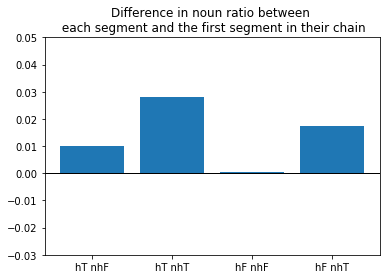

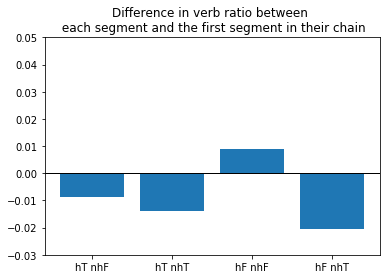

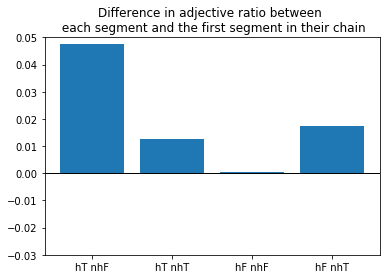

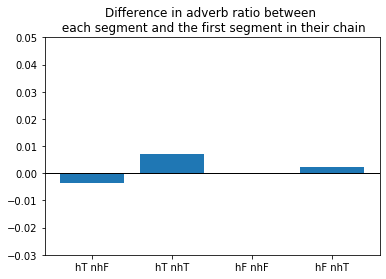

In [25]:
# plot barcharts

dicts = [dif_hT_nhF, dif_hT_nhT, dif_hF_nhF, dif_hF_nhT]
noun_dif = []
verb_dif = [] 
adj_dif = []
adv_dif = []

plots = [noun_dif, verb_dif, adj_dif, adv_dif]
labels = ['Difference in noun ratio between \n each segment and the first segment in their chain', 'Difference in verb ratio between \n each segment and the first segment in their chain', 'Difference in adjective ratio between \n each segment and the first segment in their chain', 'Difference in adverb ratio between \n each segment and the first segment in their chain']

for d in dicts:
    for key, value in d.items():
        if key == "NOUN":
            noun_dif.append(value)
        if key == "VERB":
            verb_dif.append(value)
        if key == "ADJ":
            adj_dif.append(value)
        if key == "ADV":
            adv_dif.append(value)
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

for plot in range(len(plots)):

    bars = ('hT nhF', 'hT nhT', 'hF nhF', 'hF nhT')
    y_pos = np.arange(len(bars))

    # Create bars
    plt.bar(y_pos, plots[plot])
    
#     plt.yaxis.set_major_formatter(mtick.PercentFormatter())
    threshold = 0
    plt.axhline(y=threshold,linewidth=1, color='k')
    
    # Create names on the x-axis
    axes = plt.gca()
    axes.set_ylim([-0.03,0.05])
    
    plt.xticks(y_pos, bars)
    plt.title(labels[plot])

    # Show graphic
    plt.show()


    # noun_dif

In [113]:
# plot the pie charts per group 

def plot_dict(plot_title, values):
    labels = []
    all_values = []
    
    for v in range(len(values)):
        # print("v", values[v])

        labels.append(values[v][1])
        all_values.append(values[v][0])

    fig1, ax1 = plt.subplots()
    ax1.pie(all_values, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    fig1.suptitle(plot_title, fontsize=20)
    plt.show()

## Experiments with leaving out tags in segments :)

In [114]:
def create_history_dict(chain_data):
    history_dict = {}

    # Loop through all segments
    for segment in tqdm(range(0, 6801)):
        
        # For each segment, find its place in the chain_data and add this to history dict
        for index, chain_data_row in enumerate(chain_data):
            chain_segments = chain_data_row['segments']
            
            if segment in chain_segments:

                # If segment already exits, add new index
                if segment in history_dict:
                    current_list = history_dict[segment]
                    current_list.append(index)
                    history_dict[segment] = current_list
                # If segment does not yet exist in dict, add it 
                else:
                    history_dict[segment] = [index]
                    
    return history_dict


    # geef de segment_id en het returnt de index waar het in staat

    # segment_id: [ index]
    # {0: [0],
    #  7: [0],
    #  8: [0, 4],

In [115]:
def update_history_dataset(segment_dataset, history_dict, chain_data):
    
    for segment_id, segment_data in enumerate(segment_dataset):
        segment_length = segment_data['length']
        
        # Find at which index in history file a certain segment is
        index = history_dict[segment_id]
    
        # Retrieve all indices in history file and change length
        for i in index:
            all_segments_for_that_index = chain_data[i]['segments']
            for ii, seg in enumerate(all_segments_for_that_index):

                if segment_id == seg:
                    chain_data[i]['lengths'][ii] = segment_length
                    
    return chain_data


In [116]:
def import_dialogue_data():
    
    from ChainDataset import ChainDataset

    chain_test_set = ChainDataset(
        data_dir='data/',
        segment_file='segments.json',
        chain_file='test_chains.json',
        vectors_file='vectors.json',
        split='test'
    )

    from SegmentDataset import SegmentDataset

    segment_test_set = SegmentDataset(
        data_dir='data/',
        segment_file='segments.json',
        vectors_file='vectors.json',
        split='test'
    )
    
    
    segment_test_set = copy.deepcopy(segment_test_set)   
    chain_data = copy.deepcopy(chain_test_set.chains)
    
    return segment_test_set, chain_data

In [1]:
def remove_tag(tag, segment_test_set, remove_perc=1.0, vocab, oov_dict):
    for segment_id, segment_data in enumerate(segment_test_set):
        
        pos_tags = []
        lower_case_sentence = []
        correct_sentence = []

        encoded_segment = vocab.decode(segment_data['segment'])

        for word in encoded_segment:
            if word == '-A-':
                lower_case_sentence.append(word)
                continue
            if word == '-B-':
                lower_case_sentence.append(word)
                continue
            lower_case_sentence.append(word.lower())

        for word in lower_case_sentence:

            if word not in oov_dict:
                correct_sentence.append(word)
            else:
                correct_sentence.append(oov_dict[word])

        try: 
            pos_tags += [word[1] for word in pos_tag(correct_sentence, tagset='universal')]

            # List with indices to remove
            remove_index = []
            for index, word in enumerate(pos_tags):
                if word == tag:
                    remove_index.append(index)
               
 #          loop door de candidaten die je wilt verwijderen. met een bepaalde kans worden ze ook echt verwijdert.
            new_remove = []
            for ind in remove_index:
                p = np.random.rand()
                if p < remove_perc:
                    new_remove.append(ind)
            remove_index = new_remove

            # Only keep certain percentage of indices to remove 
#             remove_index = np.random.choice(remove_index, int(remove_perc*len(remove_index)))
          
            for index in reversed(remove_index):
                del correct_sentence[index]

            encoded_sentence = vocab.encode(correct_sentence)

            segment_test_set[segment_id]['segment'] = encoded_sentence
            segment_test_set[segment_id]['length'] = len(encoded_sentence)

        except IndexError:
            continue 

    
    return segment_test_set



SyntaxError: non-default argument follows default argument (<ipython-input-1-528ff84a449c>, line 1)

In [118]:
history_dict = create_history_dict(chain_test_set.chains)
from Vocab import Vocab
vocab = Vocab('data/vocab.csv', 3)
with open('oov_dictionary.pickle', 'rb') as f:
    oov_dict = pickle.load(f)
    
    


# Remove tags from nouns
segment_test_set_cp, chain_test_set_cp = import_dialogue_data()
segment_test_set_noun = remove_tag("NOUN", segment_test_set_cp, 0.5, vocab, oov_dict)
chain_data_noun = update_history_dataset(segment_test_set_noun, history_dict, chain_test_set_cp)

# Remove tags from verbs
segment_test_set, chain_data = import_dialogue_data()
segment_test_set_verb = remove_tag("VERB", segment_test_set, 0.5)
chain_data_verb = update_history_dataset(segment_test_set_verb, history_dict, chain_data)

# Remove tags from adjectives
segment_test_set, chain_data = import_dialogue_data()
segment_test_set_adj = remove_tag("ADJ", segment_test_set, 0.5)
chain_data_adj = update_history_dataset(segment_test_set_adj, history_dict, chain_data)

# Remove tags from adverbs
segment_test_set, chain_data = import_dialogue_data()
segment_test_set_adv = remove_tag("ADV", segment_test_set, 0.5)
chain_data_adv = update_history_dataset(segment_test_set_adv, history_dict, chain_data)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 3680.64it/s]


In [126]:
# write chain information to file
with open('data/test_noun_chains.json', 'w') as json_file:
    json.dump(chain_data_noun, json_file)   

with open('data/test_verb_chains.json', 'w') as json_file:
    json.dump(chain_data_verb, json_file)
    
with open('data/test_adj_chains.json', 'w') as json_file:
    json.dump(chain_data_adj, json_file)

with open('data/test_adv_chains.json', 'w') as json_file:
    json.dump(chain_data_adv, json_file)

In [127]:
# write segments to json file
segment_data_noun_test = [seg for seg in segment_test_set_noun]
segment_data_verb_test = [seg for seg in segment_test_set_verb]
segment_data_adj_test = [seg for seg in segment_test_set_adj]
segment_data_adv_test = [seg for seg in segment_test_set_adv]

with open('data/test_noun_segments.json', 'w') as json_file:
    json.dump(segment_data_noun_test, json_file)
       
with open('data/test_verb_segments.json', 'w') as json_file:
    json.dump(segment_data_verb_test, json_file)
        
with open('data/test_adj_segments.json', 'w') as json_file:
    json.dump(segment_data_adj_test, json_file)
      
with open('data/test_adv_segments.json', 'w') as json_file:
    json.dump(segment_data_adv_test, json_file)
